In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.optimizers.legacy import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix



In [2]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   validation_split=0.2)  # Split del 20% para validación

train_data = train_datagen.flow_from_directory('/Users/baudi/AI/practicas/uvas/data/train_val/',
                                               target_size=(150, 150),
                                               batch_size=32,
                                               seed=42,
                                               shuffle=True,
                                               class_mode='categorical',
                                               subset='training')

validation_data = train_datagen.flow_from_directory('/Users/baudi/AI/practicas/uvas/data/train_val/',
                                                    target_size=(150, 150),
                                                    batch_size=32,
                                                    seed=42,
                                                    shuffle=True,
                                                    class_mode='categorical',
                                                    subset='validation')


# Carga y prepara los datos de prueba
test_datagen = ImageDataGenerator(rescale=1./255)

test_data = test_datagen.flow_from_directory('/Users/baudi/AI/practicas/uvas/data/test/',
                                             target_size=(150, 150),
                                             batch_size=32,
                                             class_mode='categorical',
                                             shuffle=False)  # No es necesario barajar las imágenes de prueba




Found 2600 images belonging to 4 classes.
Found 648 images belonging to 4 classes.
Found 814 images belonging to 4 classes.


In [3]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(512, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(1024, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(4, activation='softmax')  # 4 clases: sanas, enfermedad1, enfermedad2, enfermedad3
])

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


Metal device set to: Apple M2 Pro

systemMemory: 32.00 GB
maxCacheSize: 10.67 GB



2023-04-05 23:48:53.460475: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-04-05 23:48:53.460622: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [4]:
history = model.fit(train_data,
                    epochs=50,
                    validation_data=validation_data)


Epoch 1/50


2023-04-05 23:48:53.813300: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-04-05 23:48:54.146479: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


82/82 [==============================] - ETA: 0s - loss: 0.8098 - accuracy: 0.7381

2023-04-05 23:49:01.186813: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


82/82 [==============================] - 9s 102ms/step - loss: 0.8098 - accuracy: 0.7381 - val_loss: 2.3201 - val_accuracy: 0.2654
Epoch 2/50
82/82 [==============================] - 8s 97ms/step - loss: 0.4141 - accuracy: 0.8531 - val_loss: 5.7623 - val_accuracy: 0.1034
Epoch 3/50
82/82 [==============================] - 8s 98ms/step - loss: 0.2937 - accuracy: 0.9042 - val_loss: 7.9558 - val_accuracy: 0.1034
Epoch 4/50
82/82 [==============================] - 8s 99ms/step - loss: 0.2668 - accuracy: 0.9038 - val_loss: 10.7650 - val_accuracy: 0.1034
Epoch 5/50
82/82 [==============================] - 8s 102ms/step - loss: 0.2334 - accuracy: 0.9150 - val_loss: 9.7831 - val_accuracy: 0.1235
Epoch 6/50
82/82 [==============================] - 8s 100ms/step - loss: 0.1895 - accuracy: 0.9354 - val_loss: 6.6915 - val_accuracy: 0.2346
Epoch 7/50
82/82 [==============================] - 8s 100ms/step - loss: 0.1504 - accuracy: 0.9454 - val_loss: 4.6799 - val_accuracy: 0.3873
Epoch 8/50
82/82 [=

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 148, 148, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 72, 72, 64)       256       
 hNormalization)                                                 
                                                        

In [6]:
model.layers

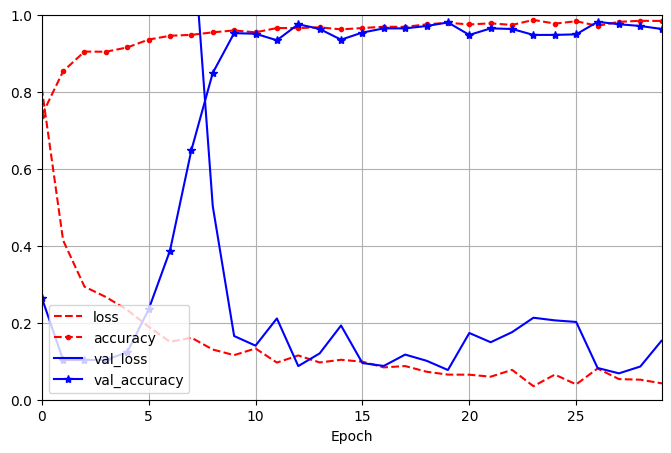

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower left")  # extra code
plt.show()


In [8]:
test_loss, test_accuracy = model.evaluate(test_data)
print("Test Loss: ", test_loss)
print("Test Accuracy: ", test_accuracy)

26/26 [==============================] - 1s 23ms/step - loss: 0.0636 - accuracy: 0.9754
Test Loss:  0.06359672546386719
Test Accuracy:  0.9754299521446228


In [9]:
# Matriz de confusión y métricas adicionales
Y_pred = model.predict(test_data)
y_pred = np.argmax(Y_pred, axis=1)

print('Classification Report:')
print(classification_report(test_data.classes, y_pred, target_names=test_data.class_indices.keys()))

print('Confusion Matrix:')
print(confusion_matrix(test_data.classes, y_pred))

 5/26 [====>.........................] - ETA: 0s

2023-04-05 23:55:53.455554: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


26/26 [==============================] - 1s 21ms/step
Classification Report:
                                            precision    recall  f1-score   support

                         Grape___Black_rot       0.98      0.95      0.97       236
              Grape___Esca_(Black_Measles)       0.98      0.97      0.98       277
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)       0.96      1.00      0.98       216
                           Grape___healthy       0.98      1.00      0.99        85

                                  accuracy                           0.98       814
                                 macro avg       0.98      0.98      0.98       814
                              weighted avg       0.98      0.98      0.98       814

Confusion Matrix:
[[224   5   6   1]
 [  4 270   3   0]
 [  0   0 215   1]
 [  0   0   0  85]]
